In [1]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Uni variant**  
**분포를 보고싶다? displot**  
곡선 없애고 싶으면 kde=False  
구간을 바꾸고 싶으면 bins=30 이런식으로 (default는 15인듯)

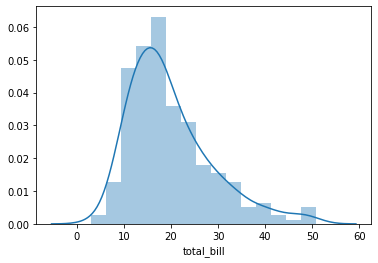

In [10]:
sns.distplot(tips["total_bill"], bins=15)

**Bi variant**  
쉽게 말해서 위에 도수분포표 2개를 합쳐준다.  
kind 안 주면 그냥 점(scatter)으로 찍힌다.hex는 육각형/진함-연함, reg는 regression line도 그려준다.이차원 kde도 가능

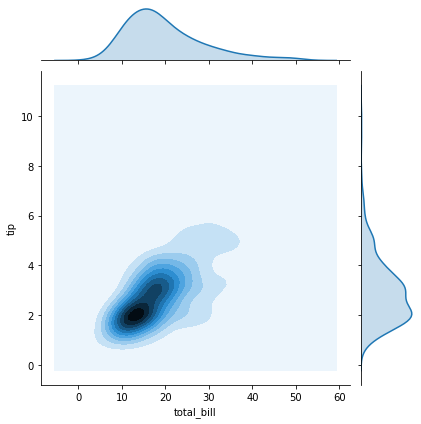

In [16]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde")

**Pair plot == joint plot for every combination possible**  
hue에 categorial범주형 column이름(ex.성별-남/녀, 학점-A,B,C,D) 넣어주면 색깔로 구별해줌 

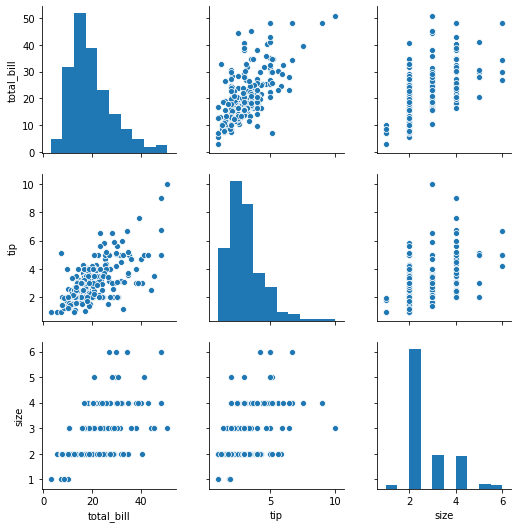

In [25]:
sns.pairplot(tips)
# sns.pairplot(tips, hue="sex", palette="coolwarm")

**Rug plot**  
draw a dash mark for every single point along the distribution line  
KDE Kernel Density Estimation을 rugplot으로 설명할 수 있다.
근데 사실 많이는 안 씀.

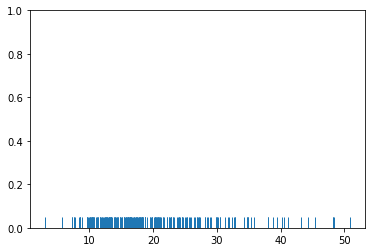

In [20]:
sns.rugplot(tips["total_bill"])

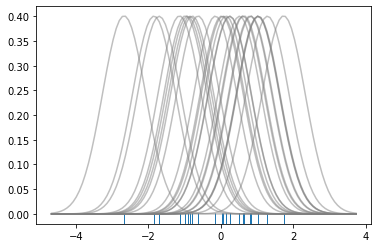

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dataset = np.random.randn(25)

sns.rugplot(dataset)

x_min=dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color="gray", alpha=0.5)

정규분포를 다 더하자!

Text(0.5, 0.98, 'Sum of the Basis Functions')

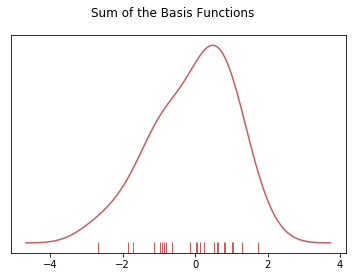

In [30]:
sum_of_kde = np.sum(kernel_list, axis=0)
fig = plt.plot(x_axis, sum_of_kde, color="indianred")
sns.rugplot(dataset, c="indianred")
plt.yticks([])
plt.suptitle("Sum of the Basis Functions")

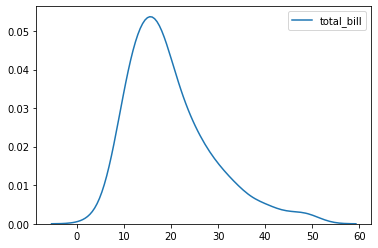

In [31]:
sns.kdeplot(tips["total_bill"])

# Categorial Plots

**Bar plot: group by action**  
estimator라는 args의 default는 avg.
x에는 범주형, y에는 numerical column

In [3]:
import numpy as np

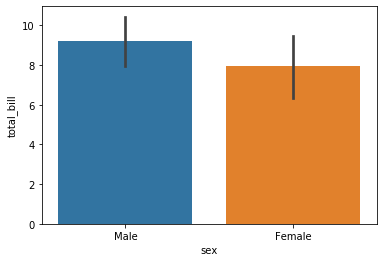

In [4]:
sns.barplot(x="sex",y="total_bill",data=tips, estimator=np.std)

**countplot**  
count the occurrence

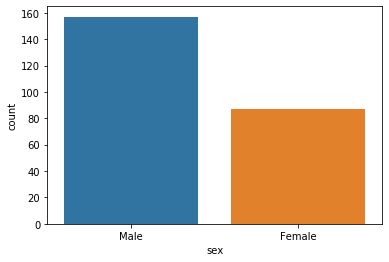

In [5]:
sns.countplot(x="sex", data=tips)

밖에 점은 outliers  
hue로 한번 더 구분

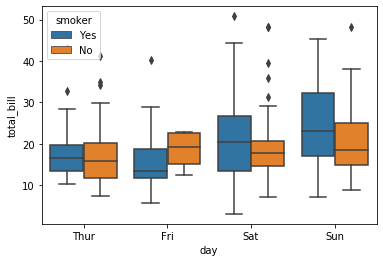

In [7]:
sns.boxplot(x="day", y="total_bill", data=tips, hue="smoker")

바이올린도 box와 마찬가지로 hue args가 있고, split 옵션으로 반갈라서 hue를 나타낼 수도 있다.

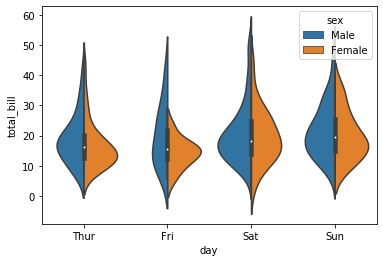

In [10]:
sns.violinplot(x="day", y="total_bill", data=tips, hue="sex", split=True)

dencity 더 잘보고 싶으면 jitter 옵션을 주자

C:\Users\USER\Anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


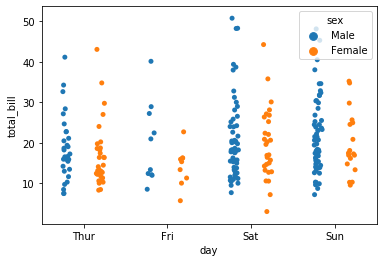

In [14]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue="sex", split=True)

scatterplot(strip)과 violent 섞으면? -> swarmplot  
단점 - scale이 큰 자료의 경우 points go way too wide. 자료가 너무 많으면 쓰지 마라

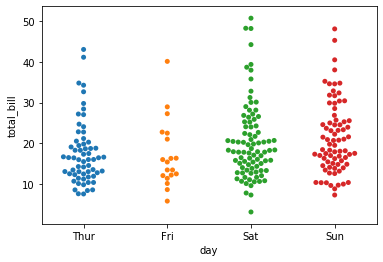

In [15]:
sns.swarmplot(x="day", y="total_bill", data=tips)

violin과 strip 같이 그리는 것도 가능

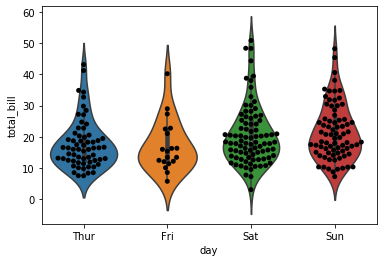

In [16]:
sns.violinplot(x="day",y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, color="black")

factor plot

C:\Users\USER\Anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


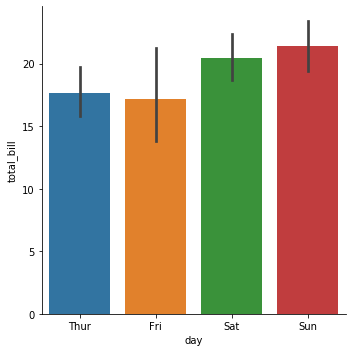

In [17]:
sns.factorplot(x="day", y="total_bill", data=tips, kind="bar")

# Matrix Plots

In [19]:
flights = sns.load_dataset("flights")

In [20]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


relevancy 볼땐 .corr() method를 이용하자

In [22]:
tc = tips.corr()

**heatmap**  
relevancy를 보고 싶을 땐 annot=True

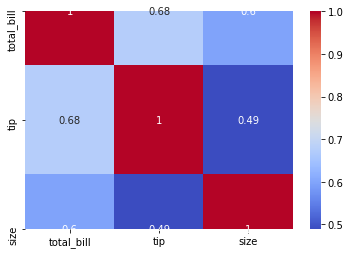

In [25]:
sns.heatmap(tc, annot=True, cmap="coolwarm")

In [24]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


특정 칼럼을 인덱스로 하는 그룹핑 -> pivot_table

In [28]:
fp = flights.pivot_table(index="month", columns="year", values="passengers")

heatmap에서 seperation을 원한다? grid나 / 간격을 띄우고 싶다? -> linecolor와 linewidths 이용하자

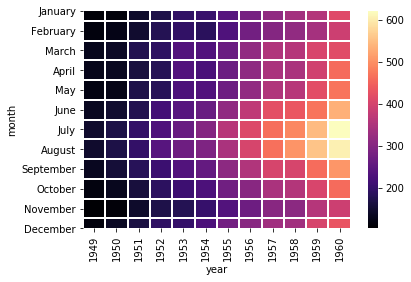

In [32]:
sns.heatmap(fp, cmap="magma", linecolor="white", linewidths=1)

**cluster**  
cluster version of heatmap  
비슷한 애들끼리 cluster시킨다.  
정규화시키려면 standard_scale=1 주면 0부터 1까지 scale로 바뀜

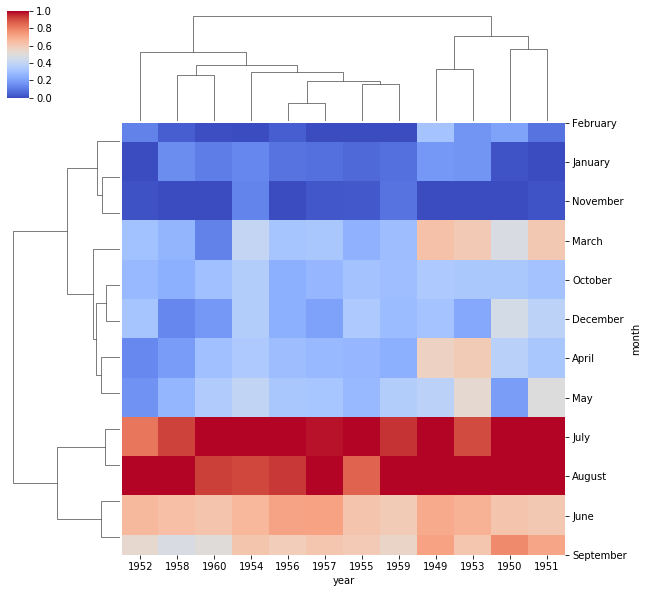

In [37]:
sns.clustermap(fp, cmap="coolwarm", standard_scale=1)

cmap == colormapping.  
보통 자주쓰이는 애들: magma, coolwarm